In [1]:
import net3d_v10_8 as n3
import net3d_v10_8_no_crossing as n3n
import gln_v5 as gln
import gln_v7_parallel as gln7p
import gln_v7 as gln7
import functions as fc

import json
jlo = lambda s: json.load(open(s,'r'))
%pylab inline
%config InlineBackend.figure_format = 'retina'
from itertools import combinations

Populating the interactive namespace from numpy and matplotlib


In [2]:
net = jlo('mouse_brain_links_not_reversed-2019-07-05-symmetrized-line_spreads-aggregated_nodes-n26-L472.json')

# calculate nGLN for real mouse brain

In [29]:
net = jlo('mouse_brain_links_not_reversed-2019-07-05-symmetrized-line_spreads-aggregated_nodes-n26-L472.json')
edge_list = [net['links'][i]['end_points'] for i in net['links']]
Adj = fc.edge_list_2_adj(edge_list)

network = gln7.simplify_v7(Adj,net)
network.find_base_loops(40)
# network.get_min_loop_set()
network.cal_normalization_const()
norm = network.new_norm
print norm
network.cal_m2_old()
network.cal_m2_normalized_new(norm = norm)
print network.m2_normalized
open('./new_mouse_brain/ngln_real_mouse_brain.txt','a').write('%f\n'%network.m2_normalized)

968665
0.148114157113


# calculate nGLN for straight-link layout

In [2]:
net = jlo('./mouse_straight_edges_new.json')
edge_list = [net['links'][i]['end_points'] for i in net['links']]
Adj = fc.edge_list_2_adj(edge_list)

network = gln7.simplify_v7(Adj,net)
network.find_base_loops(40)
# network.get_min_loop_set()
network.cal_normalization_const()
norm = network.new_norm
print norm
network.cal_m2_old()
network.cal_m2_normalized_new(norm = norm)
print network.m2_normalized

943436
0.0800732641112


# calculate real layout's equivalent link deviation

In [96]:
net = jlo('mouse_brain_links_not_reversed-2019-07-05-symmetrized-line_spreads-aggregated_nodes-n26-L472.json')
deviation = []
linklen = []
distance = []
segs = 3
for i in net['links']:
    points = array([n3.expand(array(net['links'][i]['points']),segs)])[0]
    center = [list(points[0] + (points[-1] - points[0])/(segs-1)*j) for j in range(segs)]
    dis = [sqrt(sum((array(center[j])-points[j])**2)) for j in range(1,segs-1)]
    deviation += dis
    length = 0
    for j in range(len(points)-1):
        length += sqrt(sum((points[j+1] - points[j])**2))
    linklen.append(length)
    distance.append(sqrt(sum((points[0] - points[-1])**2)))
eps = sqrt(mean(array(deviation)**2)/3)

In [97]:
eps

7.067543494682078

# run simulations

In [243]:
import os

for eps in [2.9451562666948146, 7.067543494682078, 14.988894647507053]:
    for i in range(500):
        os.system("""python ./mouse_perturbation_all.py %f & """%eps )

# analysis

In [ ]:
## calculate temperatures for the three link deviation values ##
T = lambda d: 1./arcsinh(1./d)
T_list = [T(e) for e in [2.9451562666948146, 7.067543494682078, 14.988894647507053]]

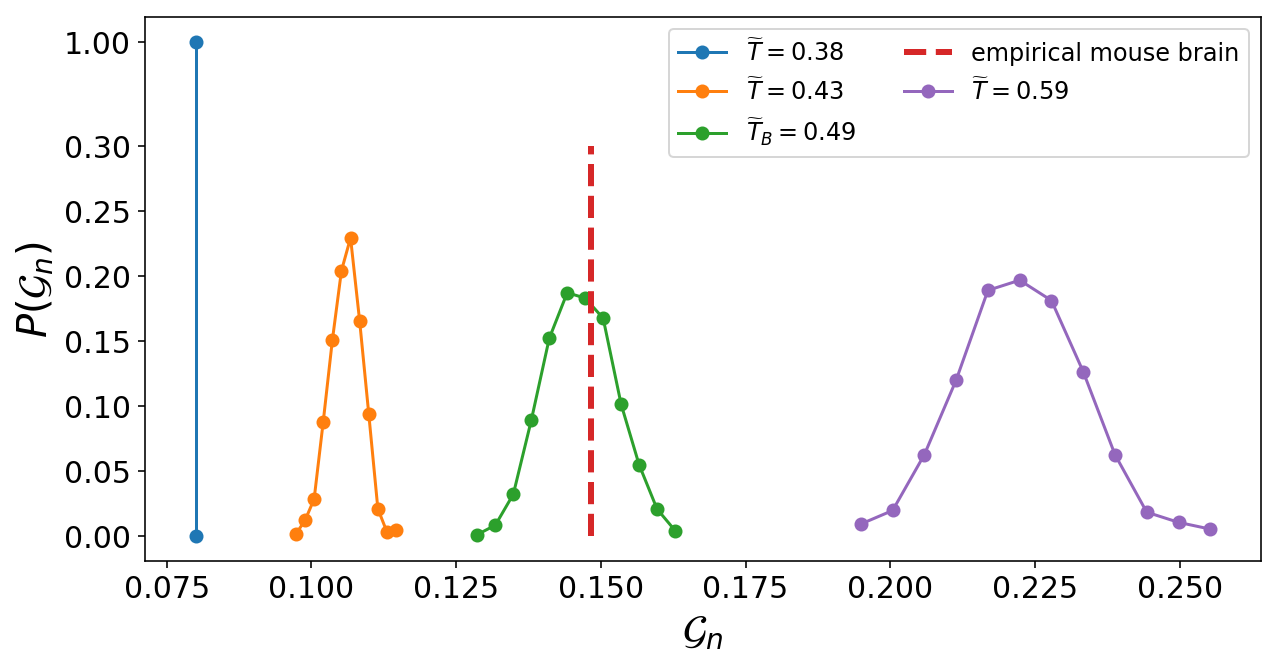

In [11]:
figure(figsize(10,5))

plot([0.08]*2, [0,0.38], 'o-', label='$\\widetilde{T}_{min} = 0.38$')

eps = 2.9451562666948146
ngln2 = []
with open('./ngln_new_mouse_perturbed_eps%f_interpolate.txt'%eps,'r') as f:
    for line in f:
        ngln2.append(float(line.strip()))

x2, y2 = fc.get_binning(ngln2, 12)
plot(x2, y2,'-o', label='$\\widetilde{T} = 0.43$')

eps = 7.067543494682078
ngln1 = []
with open('./ngln_new_mouse_perturbed_eps%f_interpolate.txt'%eps,'r') as f:
    for line in f:
        ngln1.append(float(line.strip()))

x1, y1 = fc.get_binning(ngln1, 12)
plot(x1, y1,'-o', label='$\\widetilde{T}_B = 0.49$')
plot([0.1483]*2,[0,0.3],'--', label='empirical mouse brain', linewidth=3)

eps = 14.988894647507053
ngln5 = []
with open('./ngln_new_mouse_perturbed_eps%f_interpolate.txt'%eps,'r') as f:
    for line in f:
        ngln5.append(float(line.strip()))

x5, y5 = fc.get_binning(ngln5, 12)
plot(x5, y5,'-o', label='$\\widetilde{T} = 0.59$')

yticks([0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.38],['0.00','0.05','0.10','0.15','0.20','0.25','0.30','1.00'],fontsize=15)
xticks(fontsize=15)
xlabel('$\\mathcal{G}_n$',fontsize=20)
ylabel('$P(\\mathcal{G}_n)$',fontsize=20)
legend(fontsize=12, ncol=2)
savefig('./ngln_distr.png',bbox_inches = 'tight')
savefig('./ngln_distr.pdf',bbox_inches = 'tight')